In [79]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from scipy.stats import ttest_ind_from_stats

In [80]:
df = pd.read_csv('stats.txt', sep=',')
df.head()

,problem_name,planning_time,plan_length
0,problems/problem-experiment_5x5_6_150_1/proble...,0.647604,13
1,problems/problem-experiment_5x5_6_150_1/proble...,0.819740,30
2,problems/problem-experiment_5x5_6_150_1/proble...,0.737229,24
3,problems/problem-experiment_5x5_6_150_1/proble...,0.633495,16
4,problems/problem-experiment_5x5_6_150_1/proble...,0.642722,9


In [81]:
df['is_subproblem'] = df['problem_name'].str.split('/').str.len() > 2
df['problem'] = df['problem_name'].str.split('/').str[-1]
df['size'] = df['problem'].str.split('_').str[1].str.split('x').str[0].astype(int)
df['keys_count'] = df['problem'].str.split('_').str[2].astype(int)

In [82]:
df_subproblems = df[df['is_subproblem']].copy()

df_subproblems['subproblem_part'] = df_subproblems['problem'].str.split('-').str[-1]
df_subproblems['problem'] = df_subproblems['problem'].str.split('-').str[:-1].str.join('-') + '.pddl'

df_subproblems_collected = df_subproblems.groupby(by=['problem', 'size', 'keys_count'])[['planning_time', 'plan_length']].sum().reset_index()

df_subproblems_collected['is_subproblem'] = True
df_subproblems_collected

,problem,size,keys_count,planning_time,plan_length,is_subproblem
0,problem-experiment_5x5_6_150_1-subproblem.pddl,5,6,4.045366,96,True
1,problem-experiment_5x5_6_150_10-subproblem.pddl,5,6,4.656749,117,True
2,problem-experiment_5x5_6_150_2-subproblem.pddl,5,6,5.256875,103,True
3,problem-experiment_5x5_6_150_3-subproblem.pddl,5,6,5.090151,114,True
4,problem-experiment_5x5_6_150_4-subproblem.pddl,5,6,3.844271,50,True
...,...,...,...,...,...,...
65,problem-experiment_7x7_6_150_5-subproblem.pddl,7,6,31.141544,213,True
66,problem-experiment_7x7_6_150_6-subproblem.pddl,7,6,244.312817,404,True
67,problem-experiment_7x7_6_150_7-subproblem.pddl,7,6,64.536248,109,True
68,problem-experiment_7x7_6_150_8-subproblem.pddl,7,6,96.147081,284,True


In [83]:
df_collected = pd.concat([df[~df['is_subproblem']], df_subproblems_collected], axis='rows')
df_collected['time_out'] = (df_collected['plan_length'] == -1).astype(float)

df_collected

,problem_name,planning_time,plan_length,is_subproblem,problem,size,keys_count,time_out
6,problems/problem-experiment_5x5_6_150_1.pddl,1.543421,168,False,problem-experiment_5x5_6_150_1.pddl,5,6,0.0
13,problems/problem-experiment_5x5_6_150_2.pddl,2.186317,136,False,problem-experiment_5x5_6_150_2.pddl,5,6,0.0
20,problems/problem-experiment_5x5_6_150_3.pddl,4.404218,318,False,problem-experiment_5x5_6_150_3.pddl,5,6,0.0
27,problems/problem-experiment_5x5_6_150_4.pddl,3.257369,210,False,problem-experiment_5x5_6_150_4.pddl,5,6,0.0
34,problems/problem-experiment_5x5_6_150_5.pddl,3.866662,280,False,problem-experiment_5x5_6_150_5.pddl,5,6,0.0
...,...,...,...,...,...,...,...,...
65,NaN,31.141544,213,True,problem-experiment_7x7_6_150_5-subproblem.pddl,7,6,0.0
66,NaN,244.312817,404,True,problem-experiment_7x7_6_150_6-subproblem.pddl,7,6,0.0
67,NaN,64.536248,109,True,problem-experiment_7x7_6_150_7-subproblem.pddl,7,6,0.0
68,NaN,96.147081,284,True,problem-experiment_7x7_6_150_8-subproblem.pddl,7,6,0.0


In [84]:
df_grouped = df_collected.groupby(by=['size', 'keys_count', 'is_subproblem'])[['planning_time', 'time_out']]

df_means = df_grouped.mean().reset_index()
df_counts = df_grouped.count().reset_index()
df_std = df_grouped.std().reset_index()

df_joined = pd.merge(pd.merge(df_std, df_counts, on=['size', 'keys_count', 'is_subproblem'], how='inner', suffixes=('_std', '_count')), df_means, on=['size', 'keys_count', 'is_subproblem'], how='inner', suffixes=('', '_mean'))

df_joined['std_avg'] = df_joined['planning_time_std'] / np.sqrt(df_joined['planning_time_count'])
df_joined['time_out_std_avg'] = df_joined['time_out_std'] / np.sqrt(df_joined['time_out_count'])
df_joined

,size,keys_count,is_subproblem,planning_time_std,time_out_std,planning_time_count,time_out_count,planning_time,time_out,std_avg,time_out_std_avg
0,5,6,False,1.214234,0.000000,10,10,3.264696,0.0,0.383974,0.000000
1,5,6,True,3.864061,0.000000,10,10,6.257308,0.0,1.221923,0.000000
2,6,5,False,136.687857,0.000000,10,10,64.903376,0.0,43.224496,0.000000
3,6,5,True,12.412281,0.000000,10,10,13.948264,0.0,3.925108,0.000000
4,6,6,False,98.615023,0.316228,10,10,79.330658,0.1,31.184809,0.100000
5,6,6,True,6.405388,0.000000,10,10,11.420556,0.0,2.025561,0.000000
6,6,7,False,259.347485,0.483046,10,10,228.677498,0.3,82.012876,0.152753
7,6,7,True,10.864740,0.000000,10,10,16.073258,0.0,3.435732,0.000000
8,6,8,False,221.489446,0.316228,10,10,121.510717,0.1,70.041113,0.100000
9,6,8,True,7.767985,0.000000,10,10,17.412605,0.0,2.456452,0.000000


In [85]:
df_grouped_filtered = df_collected[df_collected['plan_length'] != -1].groupby(by=['size', 'keys_count', 'is_subproblem'])[['planning_time', 'time_out', 'plan_length']]

df_means_filtered = df_grouped_filtered.mean().reset_index()
df_counts_filtered = df_grouped_filtered.count().reset_index()
df_std_filtered = df_grouped_filtered.std().reset_index()

df_joined_filtered = pd.merge(pd.merge(df_std_filtered, df_counts_filtered, on=['size', 'keys_count', 'is_subproblem'], how='inner', suffixes=('_std', '_count')), df_means_filtered, on=['size', 'keys_count', 'is_subproblem'], how='inner', suffixes=('', '_mean'))

df_joined_filtered['std_avg'] = df_joined_filtered['planning_time_std'] / np.sqrt(df_joined_filtered['planning_time_count'])
df_joined_filtered['time_out_std_avg'] = df_joined_filtered['time_out_std'] / np.sqrt(df_joined_filtered['time_out_count'])
df_joined_filtered['plan_length_std_avg'] = df_joined_filtered['plan_length_std'] / np.sqrt(df_joined_filtered['plan_length_count'])

df_joined_filtered

,size,keys_count,is_subproblem,planning_time_std,time_out_std,plan_length_std,planning_time_count,time_out_count,plan_length_count,planning_time,time_out,plan_length,std_avg,time_out_std_avg,plan_length_std_avg
0,5,6,False,1.214234,0.0,66.148738,10,10,10,3.264696,0.0,237.100000,0.383974,0.0,20.918068
1,5,6,True,3.864061,0.0,46.235628,10,10,10,6.257308,0.0,131.200000,1.221923,0.0,14.620989
2,6,5,False,136.687857,0.0,83.475612,10,10,10,64.903376,0.0,217.800000,43.224496,0.0,26.397306
3,6,5,True,12.412281,0.0,36.015429,10,10,10,13.948264,0.0,122.000000,3.925108,0.0,11.389079
4,6,6,False,63.930617,0.0,107.074092,9,9,9,54.648835,0.0,253.888889,21.310206,0.0,35.691364
5,6,6,True,6.405388,0.0,40.277372,10,10,10,11.420556,0.0,137.600000,2.025561,0.0,12.736823
6,6,7,False,40.358943,0.0,102.990984,7,7,7,68.912903,0.0,516.142857,15.254247,0.0,38.926933
7,6,7,True,10.864740,0.0,100.694533,10,10,10,16.073258,0.0,212.500000,3.435732,0.0,31.842407
8,6,8,False,152.368989,0.0,172.254011,9,9,9,68.199503,0.0,316.777778,50.789663,0.0,57.418004
9,6,8,True,7.767985,0.0,71.176151,10,10,10,17.412605,0.0,231.600000,2.456452,0.0,22.507875


In [86]:
df_means_size6 = df_joined[df_joined['size'] == 6]
df_means_keys6 = df_joined[df_joined['keys_count'] == 6]

df_means_size6_subproblems = df_means_size6[df_means_size6['is_subproblem']]
df_means_size6_full_problems = df_means_size6[~df_means_size6['is_subproblem']]

df_means_keys6_subproblems = df_means_keys6[df_means_keys6['is_subproblem']]
df_means_keys6_full_problems = df_means_keys6[~df_means_keys6['is_subproblem']]

In [87]:
df_means_size6_filtered = df_joined_filtered[df_joined_filtered['size'] == 6]
df_means_keys6_filtered = df_joined_filtered[df_joined_filtered['keys_count'] == 6]

df_means_size6_subproblems_filtered = df_means_size6_filtered[df_means_size6_filtered['is_subproblem']]
df_means_size6_full_problems_filtered = df_means_size6_filtered[~df_means_size6_filtered['is_subproblem']]

df_means_keys6_subproblems_filtered = df_means_keys6_filtered[df_means_keys6_filtered['is_subproblem']]
df_means_keys6_full_problems_filtered = df_means_keys6_filtered[~df_means_keys6_filtered['is_subproblem']]

In [88]:
df_differences = df_joined.pivot(index=['size', 'keys_count'], columns='is_subproblem', values=['planning_time', 'std_avg']).apply(
    lambda row: [
        row['planning_time'][False] - row['planning_time'][True],
        np.sqrt(row['std_avg'][False] ** 2 + row['std_avg'][True] ** 2)
    ], axis=1).reset_index(name='difference_with_std')
df_differences[['difference', 'std']] = df_differences['difference_with_std'].apply(pd.Series)

df_differences

,size,keys_count,difference_with_std,difference,std
0,5,6,"[-2.9926125982989107, 1.2808329849791902]",-2.992613,1.280833
1,6,5,"[50.95511246579991, 43.402344480846175]",50.955112,43.402344
2,6,6,"[67.91010227249808, 31.250522891369613]",67.910102,31.250523
3,6,7,"[212.6042403155003, 82.0848102736272]",212.604240,82.084810
4,6,8,"[104.09811233569708, 70.08417519044258]",104.098112,70.084175
5,6,9,"[93.33292940260071, 93.22790547129996]",93.332929,93.227905
6,7,6,"[170.34154895350056, 58.984289167202704]",170.341549,58.984289


In [89]:
df_differences_filtered = df_joined_filtered.pivot(index=['size', 'keys_count'], columns='is_subproblem', values=['plan_length', 'plan_length_std_avg']).apply(
    lambda row: [
        row['plan_length'][False] - row['plan_length'][True],
        np.sqrt(row['plan_length_std_avg'][False] ** 2 + row['plan_length_std_avg'][True] ** 2)
    ], axis=1).reset_index(name='difference_with_std')
df_differences_filtered[['difference', 'std']] = df_differences_filtered['difference_with_std'].apply(pd.Series)

df_differences_filtered

,size,keys_count,difference_with_std,difference,std
0,5,6,"[105.9, 25.521341831668817]",105.900000,25.521342
1,6,5,"[95.80000000000001, 28.749415452994672]",95.800000,28.749415
2,6,6,"[116.28888888888889, 37.89591169845093]",116.288889,37.895912
3,6,7,"[303.6428571428571, 50.29159980889321]",303.642857,50.291600
4,6,8,"[85.17777777777778, 61.671967740118944]",85.177778,61.671968
5,6,9,"[141.5, 82.75319971754604]",141.500000,82.753200
6,7,6,"[98.44999999999999, 48.068148960038435]",98.450000,48.068149


In [90]:
different_times_pvalues = df_joined.pivot(index=['size', 'keys_count'], columns='is_subproblem', values=['planning_time', 'planning_time_std', 'planning_time_count']).apply(
    lambda row:
           ttest_ind_from_stats(row['planning_time'][False], row['planning_time_std'][False], row['planning_time_count'][False],
                                row['planning_time'][True], row['planning_time_std'][True], row['planning_time_count'][True],
                                equal_var=False).pvalue, axis=1).reset_index(name='p_value')

different_times_pvalues

,size,keys_count,p_value
0,5,6,0.039900
1,6,5,0.270044
2,6,6,0.057575
3,6,7,0.029131
4,6,8,0.171536
5,6,9,0.331862
6,7,6,0.014052


In [91]:
different_lengths_pvalues_filtered = df_joined_filtered.pivot(index=['size', 'keys_count'], columns='is_subproblem', values=['plan_length', 'plan_length_std', 'plan_length_count']).apply(
    lambda row:
              ttest_ind_from_stats(row['plan_length'][False], row['plan_length_std'][False], row['plan_length_count'][False],
                                  row['plan_length'][True], row['plan_length_std'][True], row['plan_length_count'][True],
                                  equal_var=False).pvalue, axis=1).reset_index(name='p_value')

different_lengths_pvalues_filtered

,size,keys_count,p_value
0,5,6,0.000745
1,6,5,0.005826
2,6,6,0.011838
3,6,7,0.000044
4,6,8,0.196111
5,6,9,0.119051
6,7,6,0.083331


In [92]:
df_means_size6_full_problems['keys_count']

2     5
4     6
6     7
8     8
10    9
Name: keys_count, dtype: int64

In [93]:
df_means_keys6_full_problems['size']

0     5
4     6
12    7
Name: size, dtype: int64

In [113]:
x_ticks_size6 = df_means_size6_full_problems['keys_count']
x_ticks_keys6 = df_means_keys6_full_problems['size']

In [100]:
different_times_pvalues_selected = different_times_pvalues[different_times_pvalues['size'] == 6]
df_differences_selected = df_differences[df_differences['size'] == 6]

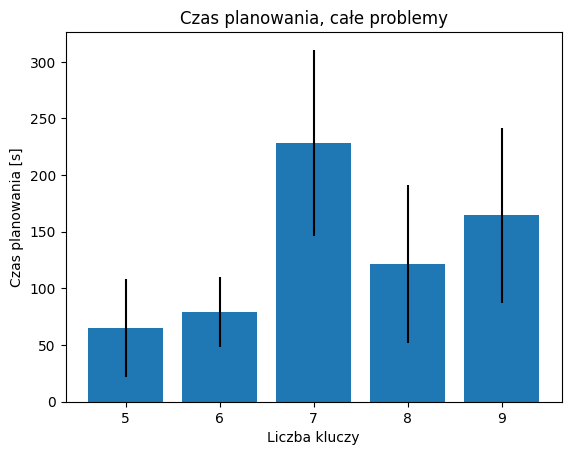

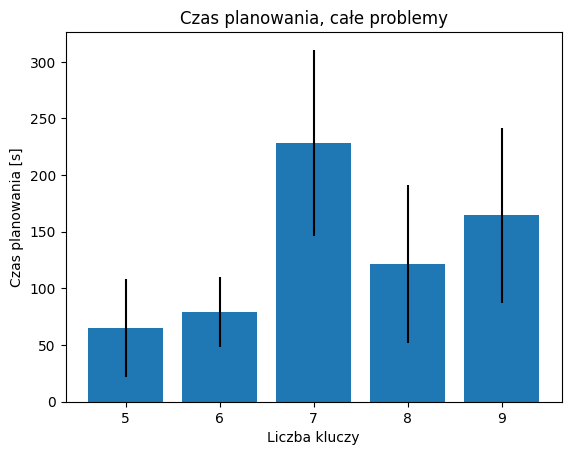

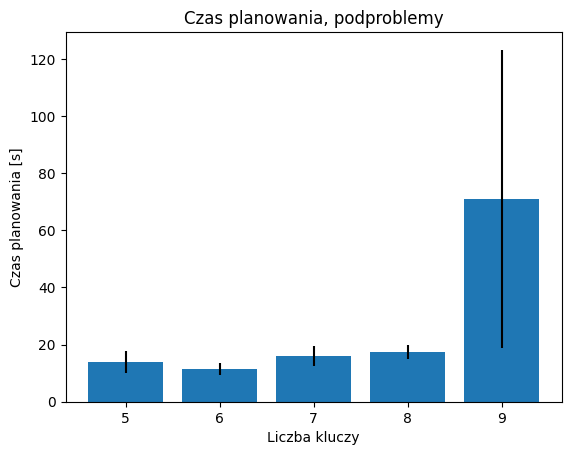

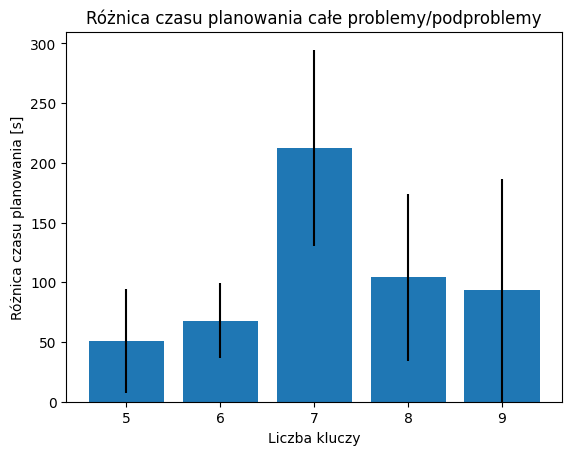

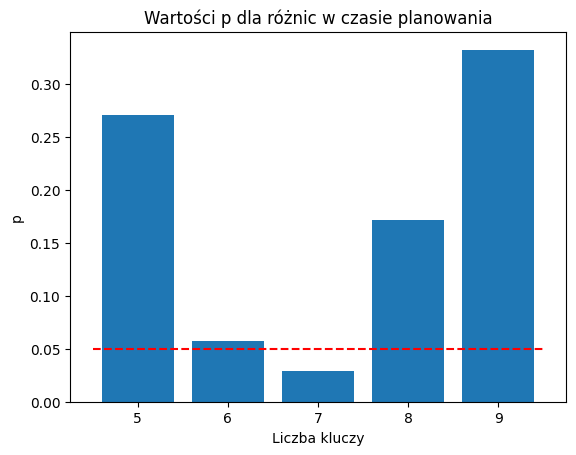

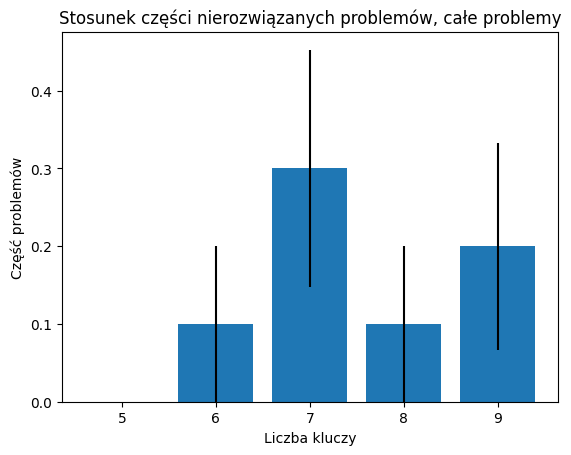

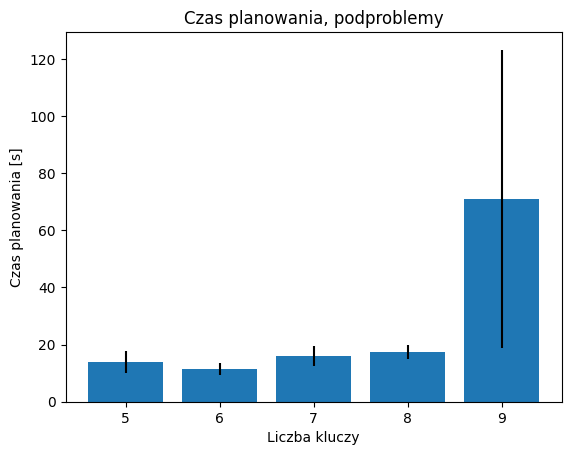

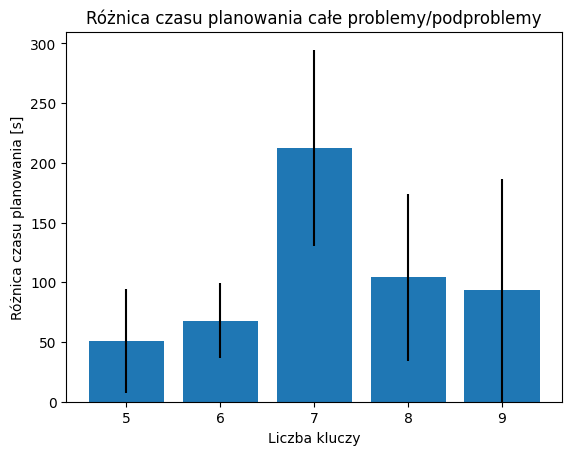

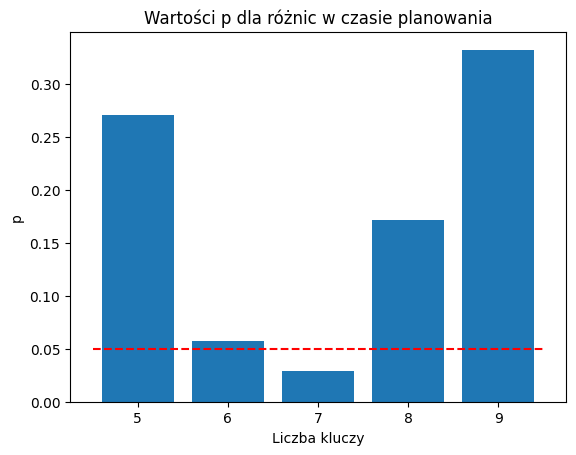

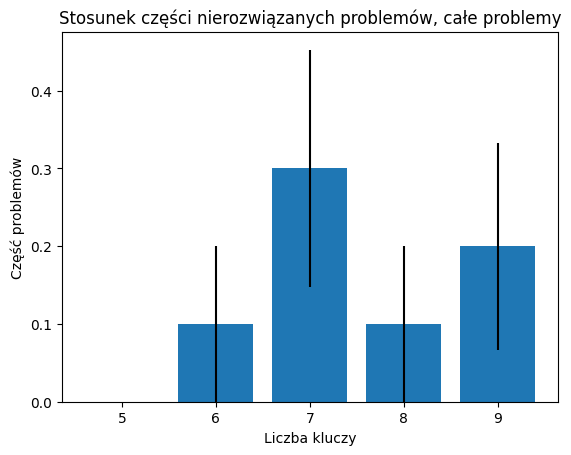

In [115]:
plt.xticks(x_ticks_size6)
plt.title("Czas planowania, całe problemy")
plt.xlabel('Liczba kluczy')
plt.ylabel('Czas planowania [s]')
plt.bar(df_means_size6_full_problems['keys_count'], df_means_size6_full_problems['planning_time'], yerr=df_means_size6_full_problems['std_avg'])
plt.show()

plt.xticks(x_ticks_size6)
plt.title("Czas planowania, całe problemy")
plt.xlabel('Liczba kluczy')
plt.ylabel('Czas planowania [s]')
plt.bar(df_means_size6_full_problems['keys_count'], df_means_size6_full_problems['planning_time'],
        yerr=df_means_size6_full_problems['std_avg'])
plt.show()

plt.xticks(x_ticks_size6)
plt.title("Czas planowania, podproblemy")
plt.xlabel('Liczba kluczy')
plt.ylabel('Czas planowania [s]')
plt.bar(df_means_size6_subproblems['keys_count'], df_means_size6_subproblems['planning_time'],
        yerr=df_means_size6_subproblems['std_avg'])
plt.show()

plt.xticks(x_ticks_size6)
plt.title("Różnica czasu planowania całe problemy/podproblemy")
plt.xlabel('Liczba kluczy')
plt.ylabel('Różnica czasu planowania [s]')
plt.bar(df_differences_selected['keys_count'], df_differences_selected['difference'],
        yerr=df_differences_selected['std'])
plt.show()

plt.xticks(x_ticks_size6)
plt.title("Wartości p dla różnic w czasie planowania")
plt.xlabel('Liczba kluczy')
plt.ylabel('p')
plt.bar(different_times_pvalues_selected['keys_count'], different_times_pvalues_selected['p_value'])
plt.plot([min(different_times_pvalues_selected['keys_count']) - 0.5,
          max(different_times_pvalues_selected['keys_count']) + 0.5], [0.05, 0.05], 'r--')
plt.show()

plt.xticks(x_ticks_size6)
plt.title("Stosunek części nierozwiązanych problemów, całe problemy")
plt.xlabel('Liczba kluczy')
plt.ylabel('Część problemów')
plt.bar(df_means_size6_full_problems['keys_count'], df_means_size6_full_problems['time_out'],
        yerr=df_means_size6_full_problems['time_out_std_avg'])
plt.show()

plt.xticks(x_ticks_size6)
plt.title("Czas planowania, podproblemy")
plt.xlabel('Liczba kluczy')
plt.ylabel('Czas planowania [s]')
plt.bar(df_means_size6_subproblems['keys_count'], df_means_size6_subproblems['planning_time'], yerr=df_means_size6_subproblems['std_avg'])
plt.show()

plt.xticks(x_ticks_size6)
plt.title("Różnica czasu planowania całe problemy/podproblemy")
plt.xlabel('Liczba kluczy')
plt.ylabel('Różnica czasu planowania [s]')
plt.bar(df_differences_selected['keys_count'], df_differences_selected['difference'], yerr=df_differences_selected['std'])
plt.show()

plt.xticks(x_ticks_size6)
plt.title("Wartości p dla różnic w czasie planowania")
plt.xlabel('Liczba kluczy')
plt.ylabel('p')
plt.bar(different_times_pvalues_selected['keys_count'], different_times_pvalues_selected['p_value'])
plt.plot([min(different_times_pvalues_selected['keys_count']) - 0.5, max(different_times_pvalues_selected['keys_count']) + 0.5], [0.05, 0.05], 'r--')
plt.show()

plt.xticks(x_ticks_size6)
plt.title("Stosunek części nierozwiązanych problemów, całe problemy")
plt.xlabel('Liczba kluczy')
plt.ylabel('Część problemów')
plt.bar(df_means_size6_full_problems['keys_count'], df_means_size6_full_problems['time_out'], yerr=df_means_size6_full_problems['time_out_std_avg'])
plt.show()

In [123]:
different_times_pvalues_keys6_selected = different_times_pvalues[different_times_pvalues['keys_count'] == 6]
df_differences_keys6_selected = df_differences[df_differences['keys_count'] == 6]

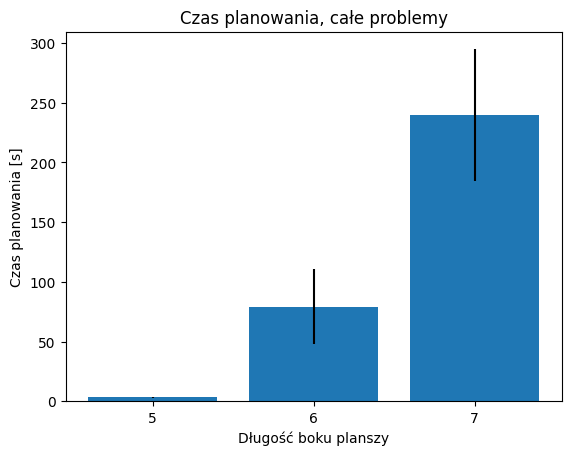

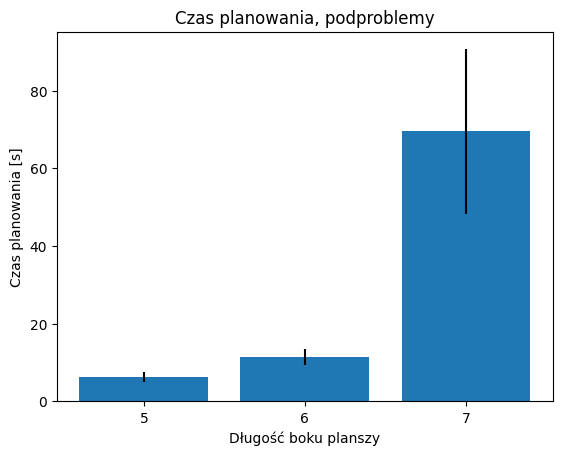

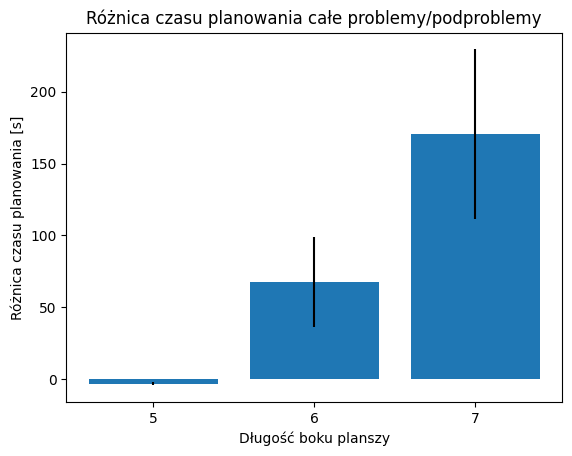

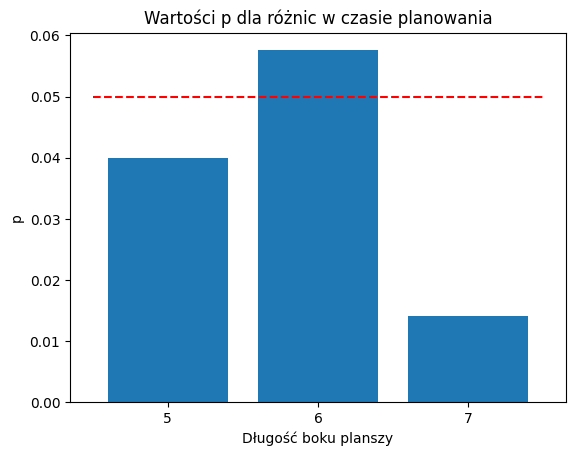

In [124]:
plt.xticks(x_ticks_keys6)
plt.title('Czas planowania, całe problemy')
plt.xlabel('Długość boku planszy')
plt.ylabel('Czas planowania [s]')
plt.bar(df_means_keys6_full_problems['size'], df_means_keys6_full_problems['planning_time'], yerr=df_means_keys6_full_problems['std_avg'])
plt.show()

plt.xticks(x_ticks_keys6)
plt.title('Czas planowania, podproblemy')
plt.xlabel('Długość boku planszy')
plt.ylabel('Czas planowania [s]')
plt.bar(df_means_keys6_subproblems['size'], df_means_keys6_subproblems['planning_time'], yerr=df_means_keys6_subproblems['std_avg'])
plt.show()

plt.xticks(x_ticks_keys6)
plt.title('Różnica czasu planowania całe problemy/podproblemy')
plt.xlabel('Długość boku planszy')
plt.ylabel('Różnica czasu planowania [s]')
plt.bar(df_differences_keys6_selected['size'], df_differences_keys6_selected['difference'], yerr=df_differences_keys6_selected['std'])
plt.show()

plt.xticks(x_ticks_keys6)
plt.title("Wartości p dla różnic w czasie planowania")
plt.xlabel('Długość boku planszy')
plt.ylabel('p')
plt.bar(different_times_pvalues_keys6_selected['size'], different_times_pvalues_keys6_selected['p_value'])
plt.plot([min(different_times_pvalues_keys6_selected['size']) - 0.5, max(different_times_pvalues_keys6_selected['size']) + 0.5], [0.05, 0.05], 'r--')
plt.show()

In [119]:
different_lengths_pvalues_filtered_size6_selected = different_lengths_pvalues_filtered[different_lengths_pvalues_filtered['size'] == 6]
df_differences_filtered_selected_size6 = df_differences_filtered[df_differences_filtered['size'] == 6]

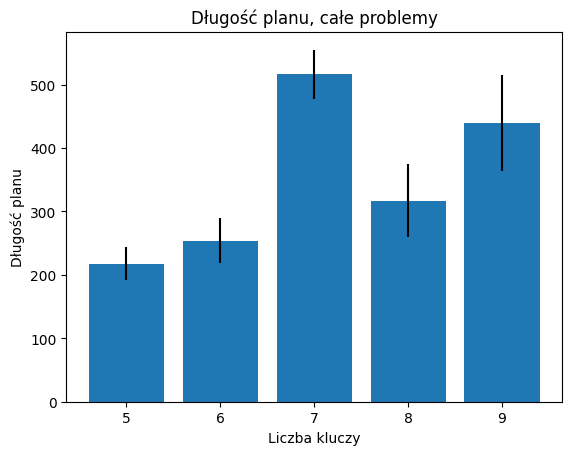

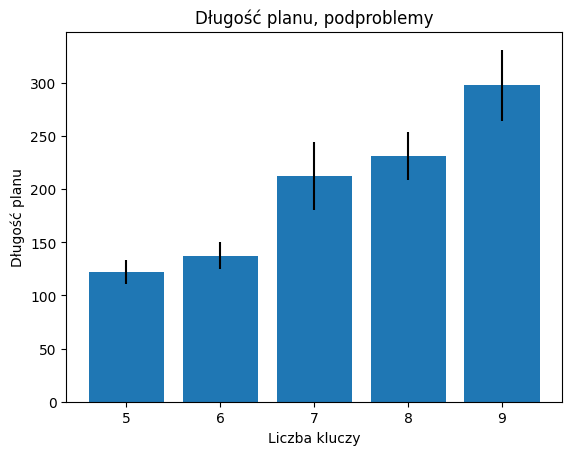

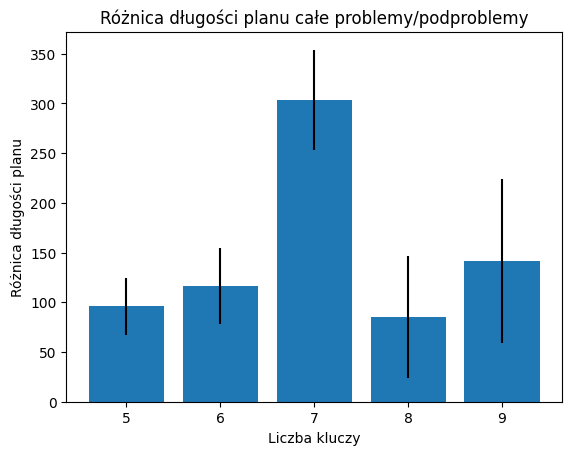

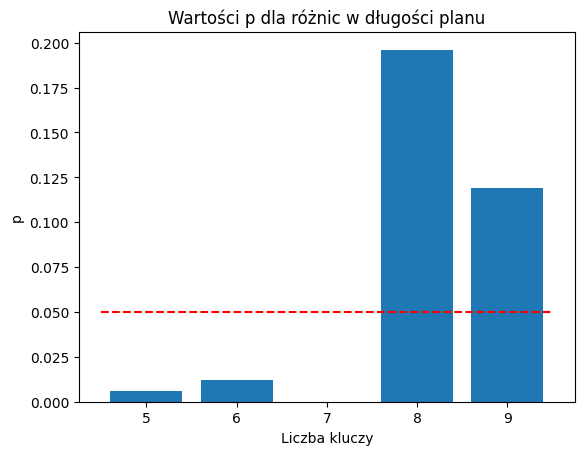

In [120]:
plt.title("Długość planu, całe problemy")
plt.xlabel('Liczba kluczy')
plt.ylabel('Długość planu')
plt.bar(df_means_size6_full_problems_filtered['keys_count'], df_means_size6_full_problems_filtered['plan_length'], yerr=df_means_size6_full_problems_filtered['plan_length_std_avg'])
plt.show()

plt.title("Długość planu, podproblemy")
plt.xlabel('Liczba kluczy')
plt.ylabel('Długość planu')
plt.bar(df_means_size6_subproblems_filtered['keys_count'], df_means_size6_subproblems_filtered['plan_length'], yerr=df_means_size6_subproblems_filtered['plan_length_std_avg'])
plt.show()

plt.title("Różnica długości planu całe problemy/podproblemy")
plt.xlabel('Liczba kluczy')
plt.ylabel('Różnica długości planu')
plt.bar(df_differences_filtered_selected_size6['keys_count'], df_differences_filtered_selected_size6['difference'], yerr=df_differences_filtered_selected_size6['std'])
plt.show()

plt.title("Wartości p dla różnic w długości planu")
plt.xlabel('Liczba kluczy')
plt.ylabel('p')
plt.bar(different_lengths_pvalues_filtered_size6_selected['keys_count'], different_lengths_pvalues_filtered_size6_selected['p_value'])
plt.plot([min(different_lengths_pvalues_filtered_size6_selected['keys_count']) - 0.5, max(different_lengths_pvalues_filtered_size6_selected['keys_count']) + 0.5], [0.05, 0.05], 'r--')
plt.show()

In [105]:
p_values_filtered_selected = different_lengths_pvalues_filtered[different_lengths_pvalues_filtered['keys_count'] == 6]
df_differences_filtered_selected = df_differences_filtered[df_differences_filtered['keys_count'] == 6]

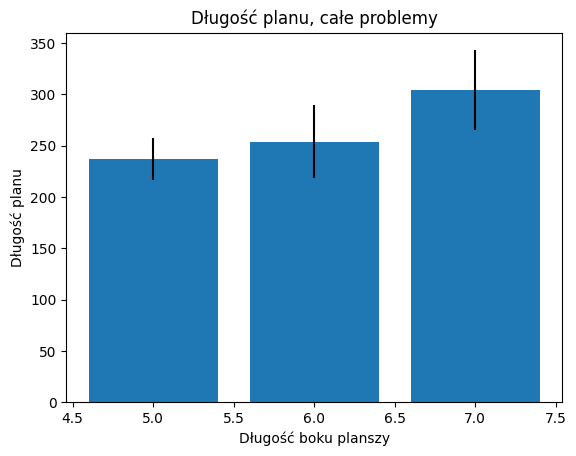

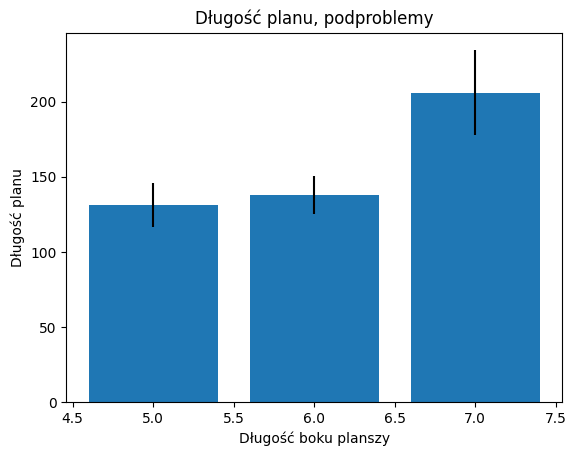

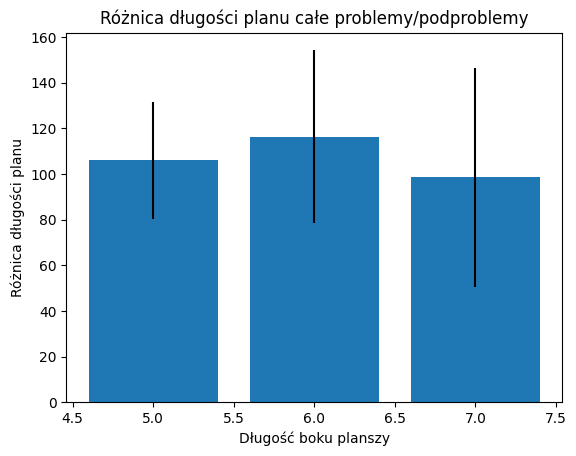

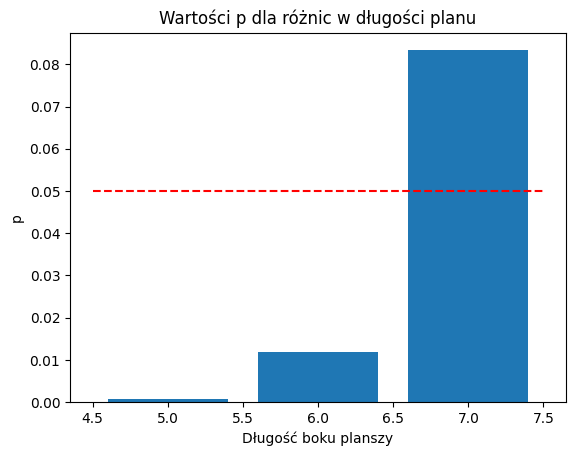

In [106]:

plt.title("Długość planu, całe problemy")
plt.xlabel('Długość boku planszy')
plt.ylabel('Długość planu')
plt.bar(df_means_keys6_full_problems_filtered['size'], df_means_keys6_full_problems_filtered['plan_length'], yerr=df_means_keys6_full_problems_filtered['plan_length_std_avg'])
plt.show()

plt.title("Długość planu, podproblemy")
plt.xlabel('Długość boku planszy')
plt.ylabel('Długość planu')
plt.bar(df_means_keys6_subproblems_filtered['size'], df_means_keys6_subproblems_filtered['plan_length'], yerr=df_means_keys6_subproblems_filtered['plan_length_std_avg'])
plt.show()

plt.title("Różnica długości planu całe problemy/podproblemy")
plt.xlabel('Długość boku planszy')
plt.ylabel('Różnica długości planu')
plt.bar(df_differences_filtered_selected['size'], df_differences_filtered_selected['difference'], yerr=df_differences_filtered_selected['std'])
plt.show()

plt.title("Wartości p dla różnic w długości planu")
plt.xlabel('Długość boku planszy')
plt.ylabel('p')
plt.bar(p_values_filtered_selected['size'], p_values_filtered_selected['p_value'])
plt.plot([min(p_values_filtered_selected['size']) - 0.5, max(p_values_filtered_selected['size']) + 0.5], [0.05, 0.05], 'r--')
plt.show()